# Feature Engineering Project

### Importing the necessary libraries

In [173]:
import pandas as pd 
import numpy as np
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from sklearn.preprocessing import MinMaxScaler

In [141]:
dataset=pd.read_csv(r'C:\Users\najeh\OneDrive\Desktop\Project\Feature Engineering\Data\PEP1.csv',index_col=0)

In [143]:
num_bins = int(np.ceil(1 + np.log2(len(dataset['SalePrice']))))
bins = pd.cut(dataset['SalePrice'], bins=num_bins, labels=False)
dataset['SalePrice_bins'] = bins
dataset['SalePrice_bins'] = dataset['SalePrice_bins'].astype('object')

### 1.	Understand the dataset

#### a. Identify the shape of the dataset

In [144]:
dataset.shape

(1460, 81)

#### b.	Identify variables with null values

In [145]:
dataset.isna().any()

MSSubClass        False
MSZoning          False
LotFrontage        True
LotArea           False
Street            False
                  ...  
YrSold            False
SaleType          False
SaleCondition     False
SalePrice         False
SalePrice_bins    False
Length: 81, dtype: bool

#### c.	Identify variables with unique values

In [146]:
dataset.nunique()

MSSubClass          15
MSZoning             5
LotFrontage        110
LotArea           1073
Street               2
                  ... 
YrSold               5
SaleType             9
SaleCondition        6
SalePrice          663
SalePrice_bins      11
Length: 81, dtype: int64

In [147]:
for each in dataset:
    print(each,dataset[each].unique())

MSSubClass [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
MSZoning ['RL' 'RM' 'C (all)' 'FV' 'RH']
LotFrontage [ 65.  80.  68.  60.  84.  85.  75.  nan  51.  50.  70.  91.  72.  66.
 101.  57.  44. 110.  98.  47. 108. 112.  74. 115.  61.  48.  33.  52.
 100.  24.  89.  63.  76.  81.  95.  69.  21.  32.  78. 121. 122.  40.
 105.  73.  77.  64.  94.  34.  90.  55.  88.  82.  71. 120. 107.  92.
 134.  62.  86. 141.  97.  54.  41.  79. 174.  99.  67.  83.  43. 103.
  93.  30. 129. 140.  35.  37. 118.  87. 116. 150. 111.  49.  96.  59.
  36.  56. 102.  58.  38. 109. 130.  53. 137.  45. 106. 104.  42.  39.
 144. 114. 128. 149. 313. 168. 182. 138. 160. 152. 124. 153.  46.]
LotArea [ 8450  9600 11250 ... 17217 13175  9717]
Street ['Pave' 'Grvl']
Alley [nan 'Grvl' 'Pave']
LotShape ['Reg' 'IR1' 'IR2' 'IR3']
LandContour ['Lvl' 'Bnk' 'Low' 'HLS']
Utilities ['AllPub' 'NoSeWa']
LotConfig ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']
LandSlope ['Gtl' 'Mod' 'Sev']
Neighborhood ['CollgCr' 'V

### 2.	Generate a separate dataset for numerical and categorical variables

In [148]:
num_data=dataset.select_dtypes(include='number')
cat_data=dataset.select_dtypes(exclude='number')

In [149]:
num_data.head(5)

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
Id                                                                          
1           60         65.0     8450            7            5       2003   
2           20         80.0     9600            6            8       1976   
3           60         68.0    11250            7            5       2001   
4           70         60.0     9550            7            5       1915   
5           60         84.0    14260            8            5       2000   

    YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
Id                                                    ...               
1           2003       196.0         706           0  ...           0   
2           1976         0.0         978           0  ...         298   
3           2002       162.0         486           0  ...           0   
4           1970         0.0         216           0  ...           0   
5           2000       350.0         655           0  ...         192   

    OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
Id                                                                          
1            61              0          0            0         0        0   
2             0              0          0            0         0        0   
3            42              0          0            0         0        0   
4            35            272          0            0         0        0   
5            84              0          0            0         0        0   

    MoSold  YrSold  SalePrice  
Id                             
1        2    2008     208500  
2        5    2007     181500  
3        9    2008     223500  
4        2    2006     140000  
5       12    2008     250000  

[5 rows x 37 columns]

In [150]:
cat_data.head(5)

MSZoning Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
Id                                                                            
1        RL   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
2        RL   Pave   NaN      Reg         Lvl    AllPub       FR2       Gtl   
3        RL   Pave   NaN      IR1         Lvl    AllPub    Inside       Gtl   
4        RL   Pave   NaN      IR1         Lvl    AllPub    Corner       Gtl   
5        RL   Pave   NaN      IR1         Lvl    AllPub       FR2       Gtl   

   Neighborhood Condition1  ... GarageFinish GarageQual GarageCond PavedDrive  \
Id                          ...                                                 
1       CollgCr       Norm  ...          RFn         TA         TA          Y   
2       Veenker      Feedr  ...          RFn         TA         TA          Y   
3       CollgCr       Norm  ...          RFn         TA         TA          Y   
4       Crawfor       Norm  ...          Unf         TA         TA          Y   
5       NoRidge       Norm  ...          RFn         TA         TA          Y   

   PoolQC Fence MiscFeature SaleType SaleCondition SalePrice_bins  
Id                                                                 
1     NaN   NaN         NaN       WD        Normal              2  
2     NaN   NaN         NaN       WD        Normal              2  
3     NaN   NaN         NaN       WD        Normal              3  
4     NaN   NaN         NaN       WD       Abnorml              1  
5     NaN   NaN         NaN       WD        Normal              3  

[5 rows x 44 columns]

### 3.	EDA of numerical variables

#### a.	Missing value treatment

In [151]:
num_data_cleaing=SimpleImputer(missing_values=np.nan,strategy='mean',copy=True)
num_data_cleaing=num_data_cleaing.fit_transform(num_data)
num_df=pd.DataFrame(num_data_cleaing,columns=num_data.columns)

#### b.	Identify the skewness and distribution

In [152]:
skewness=num_df.skew()
skewness

MSSubClass        1.407657
LotFrontage       2.384950
LotArea          12.207688
OverallQual       0.216944
OverallCond       0.693067
YearBuilt        -0.613461
YearRemodAdd     -0.503562
MasVnrArea        2.676412
BsmtFinSF1        1.685503
BsmtFinSF2        4.255261
BsmtUnfSF         0.920268
TotalBsmtSF       1.524255
1stFlrSF          1.376757
2ndFlrSF          0.813030
LowQualFinSF      9.011341
GrLivArea         1.366560
BsmtFullBath      0.596067
BsmtHalfBath      4.103403
FullBath          0.036562
HalfBath          0.675897
Bedroom           0.211790
Kitchen           4.488397
TotRmsAbvGrd      0.676341
Fireplaces        0.649565
GarageYrBlt      -0.668175
GarageCars       -0.342549
GarageArea        0.179981
WoodDeckSF        1.541376
OpenPorchSF       2.364342
EnclosedPorch     3.089872
3SsnPorch        10.304342
ScreenPorch       4.122214
PoolArea         14.828374
MiscVal          24.476794
MoSold            0.212053
YrSold            0.096269
SalePrice         1.882876
d

#### c.	Identify significant variables using a correlation matrix 

<Axes: >

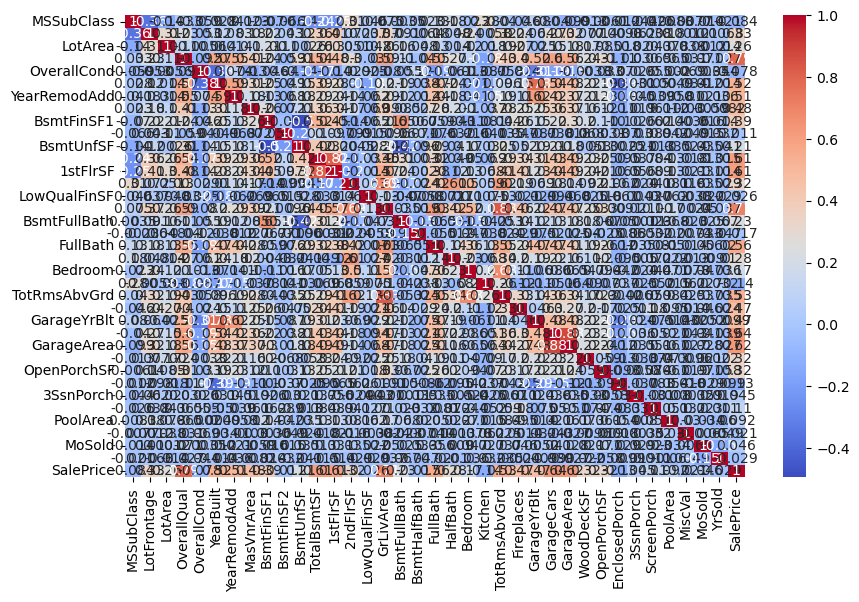

In [153]:
correlation_matrix=num_df.corr()
plt.figure(figsize=(10,6))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')

<Axes: >

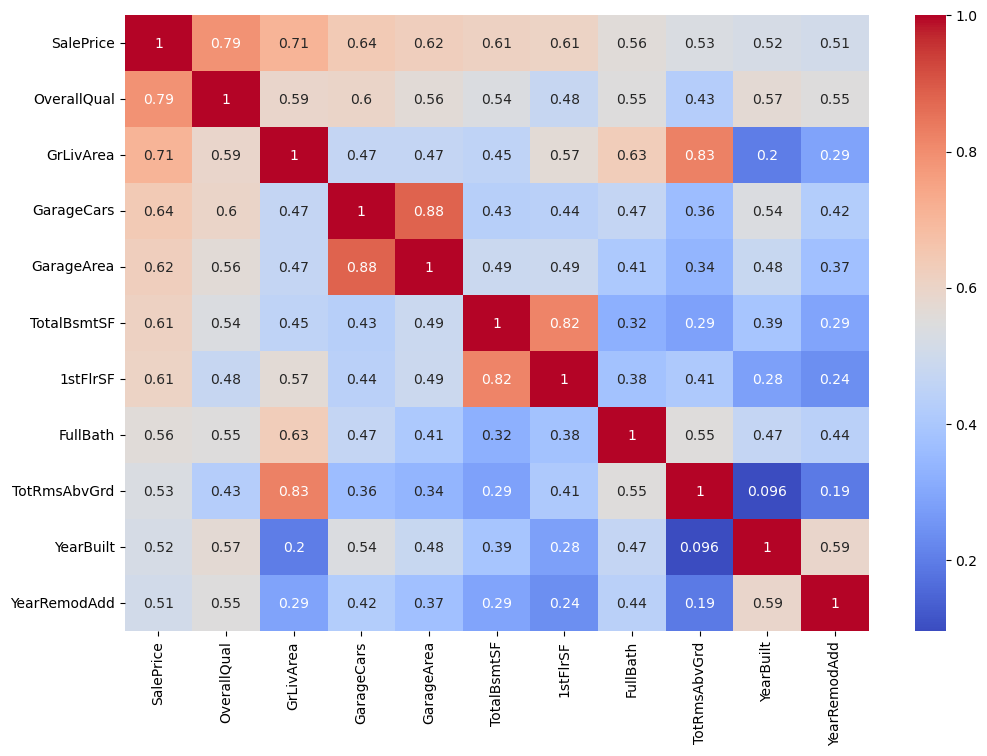

In [154]:
correlation_matrix_sort=correlation_matrix['SalePrice'].sort_values(ascending=False)
correlation_matrix_final=correlation_matrix_sort[correlation_matrix['SalePrice'] > 0.5]
correlation_matrix_final=correlation_matrix_final.to_frame()
cols=correlation_matrix_final.index
correlation_matrix_new = num_df[cols].corr()
plt.figure(figsize=(12,8))
sns.heatmap(correlation_matrix_new , cmap='coolwarm', annot=True)

#### d.	Pair plot for distribution and density

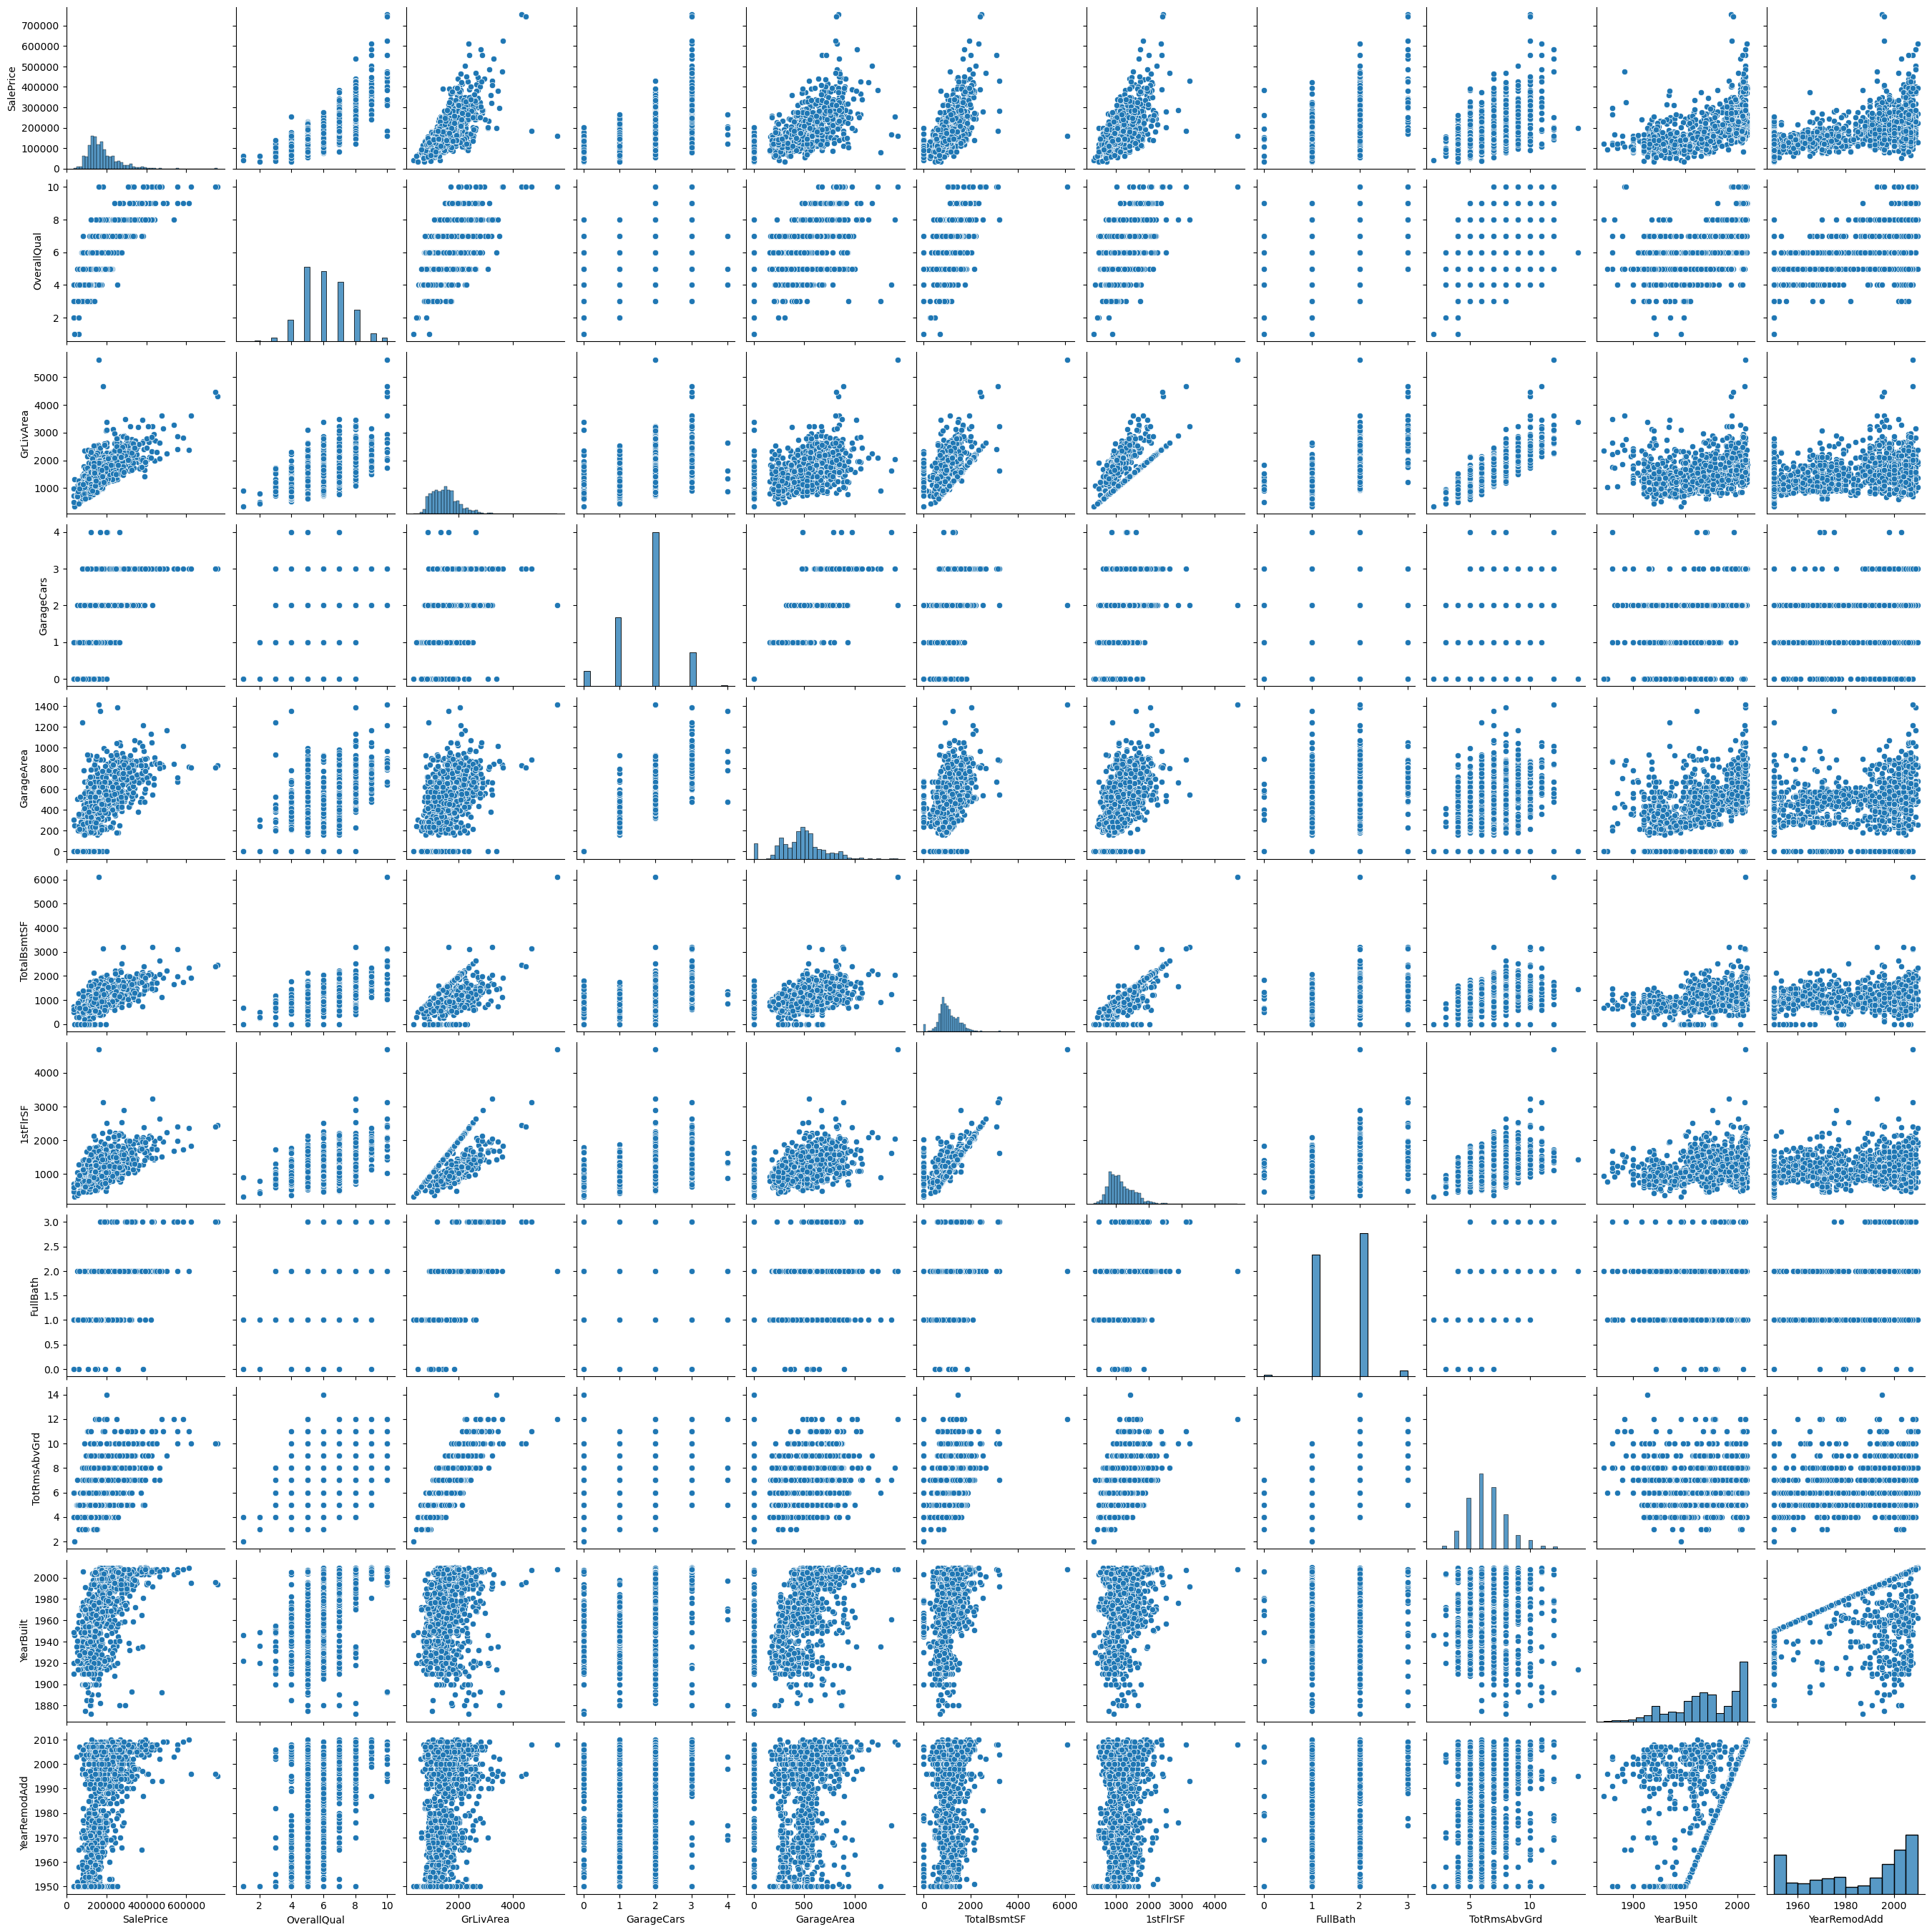

In [155]:
correlation_columns = correlation_matrix_new.columns
sns.pairplot(num_df[correlation_columns])

In [156]:
num_final=num_df[correlation_columns]
num_final.head(10)

SalePrice  OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  \
0   208500.0          7.0     1710.0         2.0       548.0        856.0   
1   181500.0          6.0     1262.0         2.0       460.0       1262.0   
2   223500.0          7.0     1786.0         2.0       608.0        920.0   
3   140000.0          7.0     1717.0         3.0       642.0        756.0   
4   250000.0          8.0     2198.0         3.0       836.0       1145.0   
5   143000.0          5.0     1362.0         2.0       480.0        796.0   
6   307000.0          8.0     1694.0         2.0       636.0       1686.0   
7   200000.0          7.0     2090.0         2.0       484.0       1107.0   
8   129900.0          7.0     1774.0         2.0       468.0        952.0   
9   118000.0          5.0     1077.0         1.0       205.0        991.0   

   1stFlrSF  FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  
0     856.0       2.0           8.0     2003.0        2003.0  
1    1262.0       2.0           6.0     1976.0        1976.0  
2     920.0       2.0           6.0     2001.0        2002.0  
3     961.0       1.0           7.0     1915.0        1970.0  
4    1145.0       2.0           9.0     2000.0        2000.0  
5     796.0       1.0           5.0     1993.0        1995.0  
6    1694.0       2.0           7.0     2004.0        2005.0  
7    1107.0       2.0           7.0     1973.0        1973.0  
8    1022.0       2.0           8.0     1931.0        1950.0  
9    1077.0       1.0           5.0     1939.0        1950.0

### 4.	EDA of categorical variables

#### a.	Missing value treatment

In [161]:
null_columns = cat_data.columns[cat_data.isnull().any()]
for col in null_columns:
    null_rows = cat_data[col].isnull().sum()
    total_rows = cat_data.shape[0]
    null_percent = (null_rows / total_rows) * 100
    print(f" {col}: {null_percent:.1f}%")

 MasVnrType: 0.5%
 BsmtQual: 2.5%
 BsmtCond: 2.5%
 BsmtExposure: 2.6%
 BsmtFinType1: 2.5%
 BsmtFinType2: 2.6%
 Electrical: 0.1%
 FireplaceQu: 47.3%
 GarageType: 5.5%
 GarageFinish: 5.5%
 GarageQual: 5.5%
 GarageCond: 5.5%


In [162]:
cat_data_cleaing=SimpleImputer(strategy='most_frequent',copy=True)
cat_data_cleaing=cat_data_cleaing.fit_transform(cat_data)
cat_df=pd.DataFrame(cat_data_cleaing,columns=cat_data.columns)

#### b.	Count plot for bivariate analysis

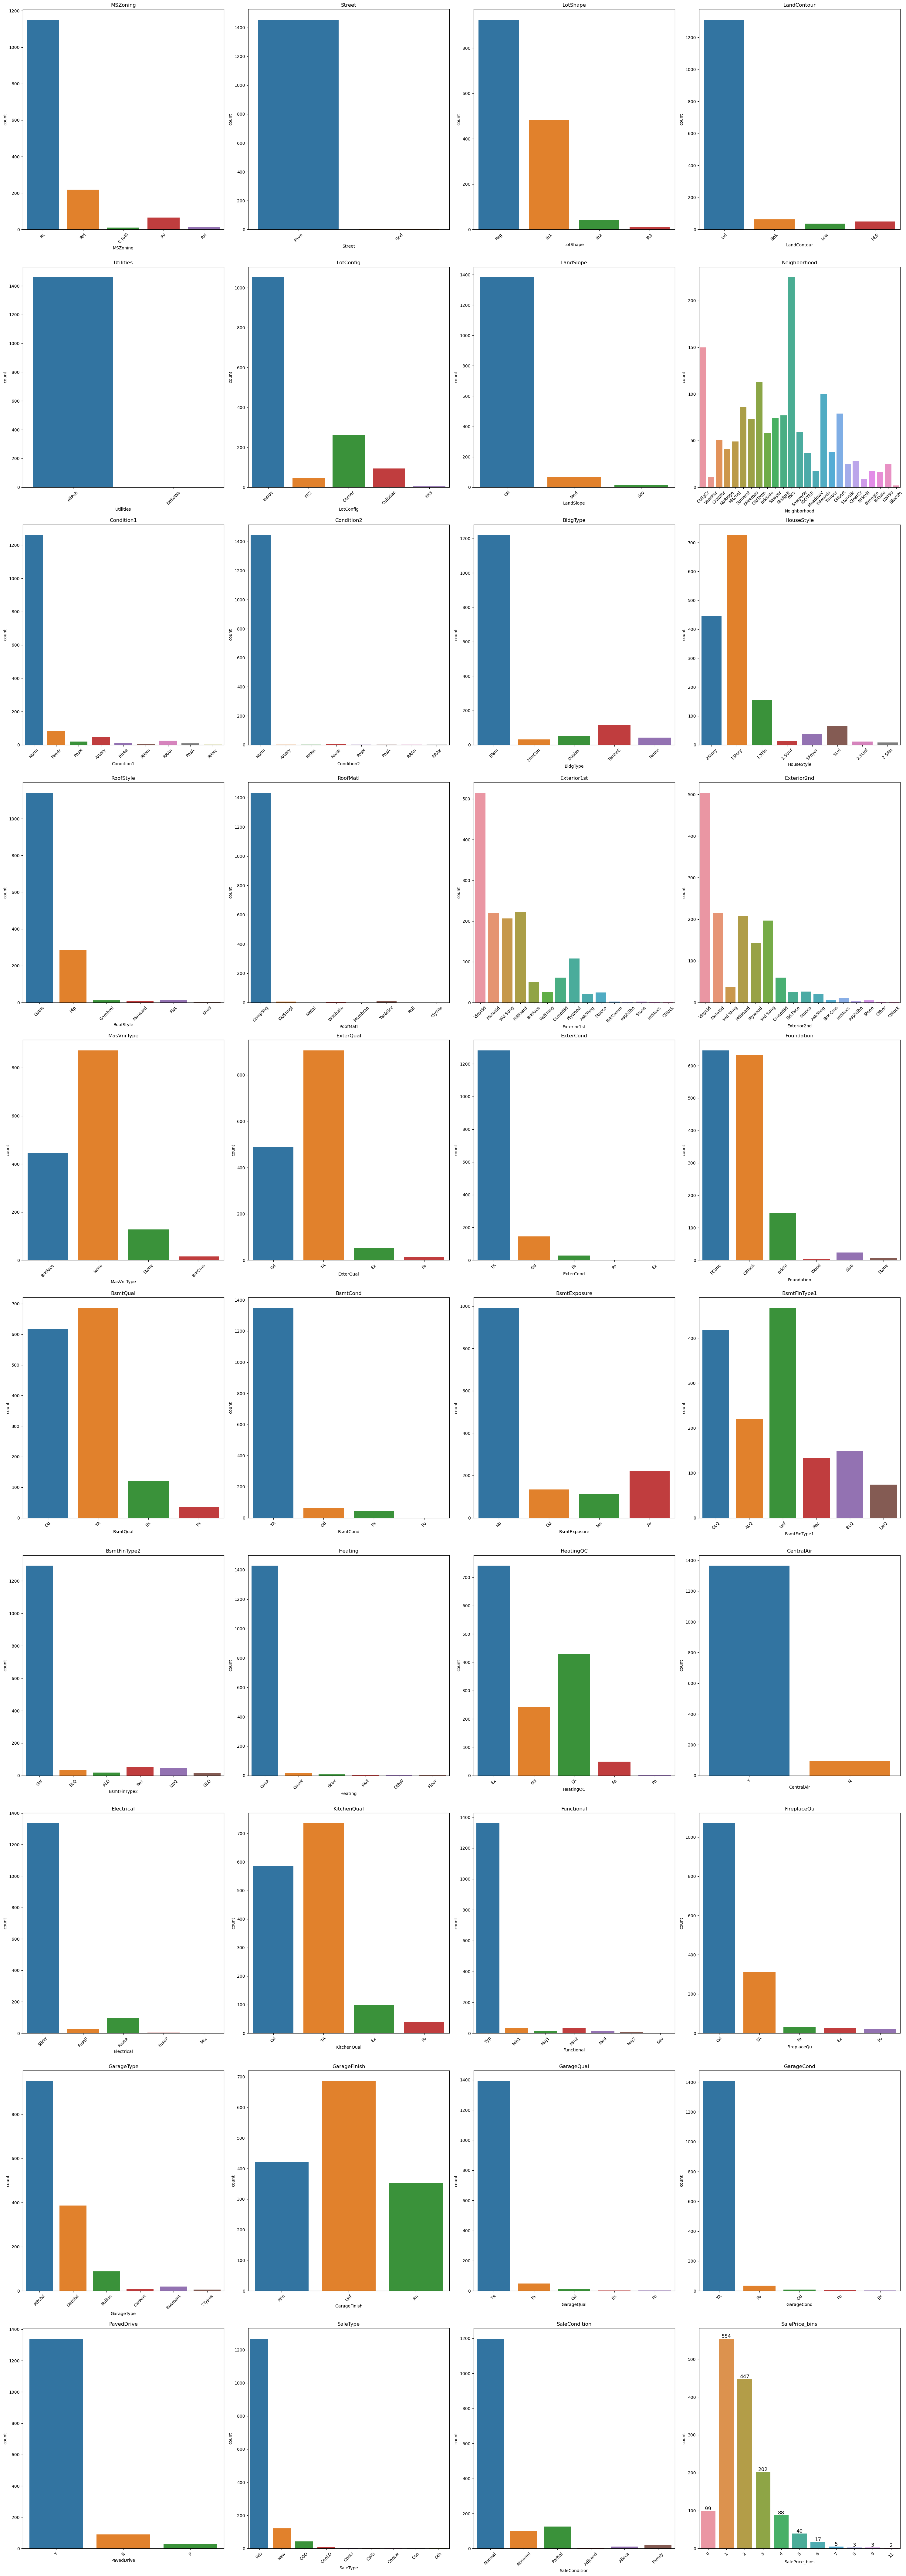

In [163]:
cat_df_cols=list(cat_df.columns)
fig, axes = plt.subplots(nrows=10, ncols=4, figsize=(30, 85))
axes = axes.flatten()
for i, col in enumerate(cat_df_cols):
    sns.countplot(x=col, data=cat_df, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=45)
for p in axes[i].containers:
    axes[i].bar_label(p, label_type='edge', fontsize=12)
plt.tight_layout()

#### c.	Identify significant variables using p-values and Chi-Square values

In [164]:
results = []

alpha = 0.05

for col in cat_df.columns:
    if col != 'SalePrice_bins':
        crosstab = pd.crosstab(cat_df[col], cat_df['SalePrice_bins'])
        chi2, p_value, dof, expected = chi2_contingency(crosstab)
        results.append((col, 'SalePrice_bins', chi2, p_value, dof))

results_df = pd.DataFrame(results, columns=['variable_1', 'variable_2', 'chi2', 'p_value', 'dof'])

In [165]:
final_results_df=results_df[results_df['p_value'] < alpha]
variable_names=final_results_df['variable_1'].unique()
cat_final=cat_df[variable_names]
cat_final.shape

(1460, 35)

### 5.	Combine all the significant categorical and numerical variables

In [166]:
new_dataset=pd.concat([cat_final,num_final],axis=1)

In [167]:
new_dataset.shape

(1460, 46)

In [168]:
new_dataset.head()

MSZoning LotShape LandContour LotConfig Neighborhood Condition1 BldgType  \
0       RL      Reg         Lvl    Inside      CollgCr       Norm     1Fam   
1       RL      Reg         Lvl       FR2      Veenker      Feedr     1Fam   
2       RL      IR1         Lvl    Inside      CollgCr       Norm     1Fam   
3       RL      IR1         Lvl    Corner      Crawfor       Norm     1Fam   
4       RL      IR1         Lvl       FR2      NoRidge       Norm     1Fam   

  HouseStyle RoofStyle RoofMatl  ... OverallQual GrLivArea GarageCars  \
0     2Story     Gable  CompShg  ...         7.0    1710.0        2.0   
1     1Story     Gable  CompShg  ...         6.0    1262.0        2.0   
2     2Story     Gable  CompShg  ...         7.0    1786.0        2.0   
3     2Story     Gable  CompShg  ...         7.0    1717.0        3.0   
4     2Story     Gable  CompShg  ...         8.0    2198.0        3.0   

  GarageArea TotalBsmtSF 1stFlrSF FullBath TotRmsAbvGrd YearBuilt YearRemodAdd  
0      548.0       856.0    856.0      2.0          8.0    2003.0       2003.0  
1      460.0      1262.0   1262.0      2.0          6.0    1976.0       1976.0  
2      608.0       920.0    920.0      2.0          6.0    2001.0       2002.0  
3      642.0       756.0    961.0      1.0          7.0    1915.0       1970.0  
4      836.0      1145.0   1145.0      2.0          9.0    2000.0       2000.0  

[5 rows x 46 columns]

### 6.	Plot box plot for the new dataset to find the variables with outliers

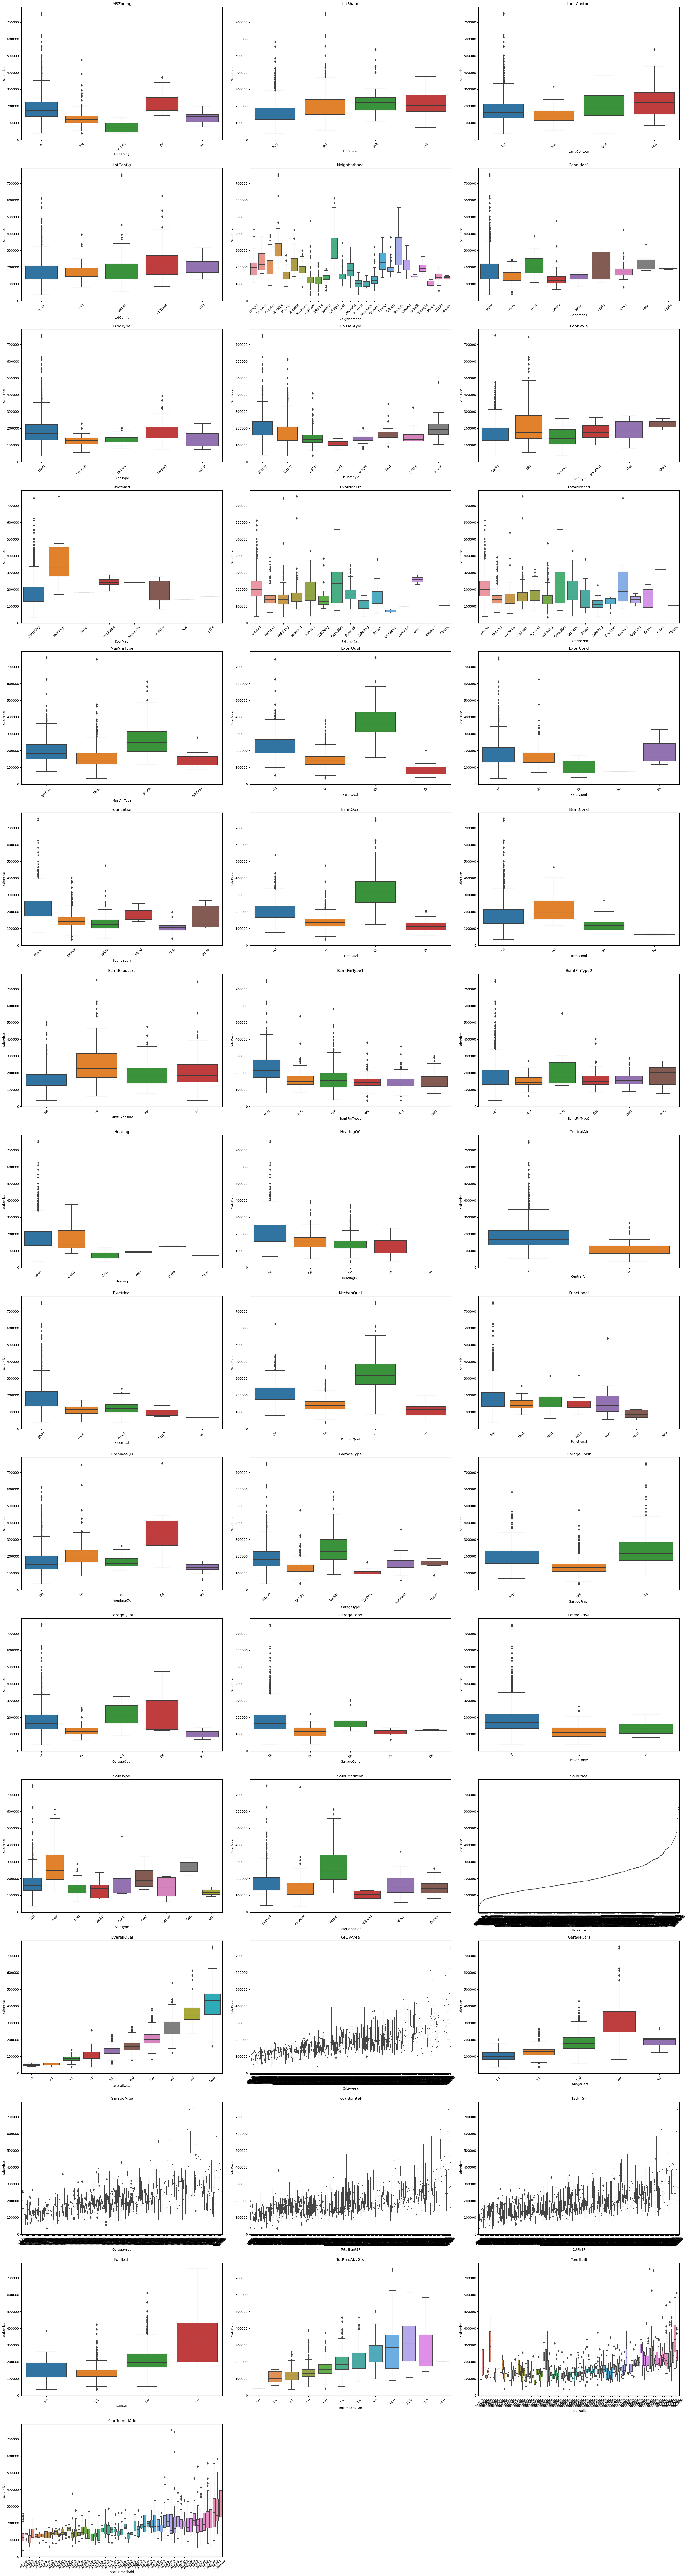

In [169]:
all_cols = list(new_dataset.columns)

num_rows = (len(all_cols) + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(30, 7 * num_rows))

if len(all_cols) % 3 != 0:
    for i in range(len(all_cols) % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

axes = axes.flatten()

for i, col in enumerate(all_cols):
    sns.boxplot(data=new_dataset, y='SalePrice', x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()

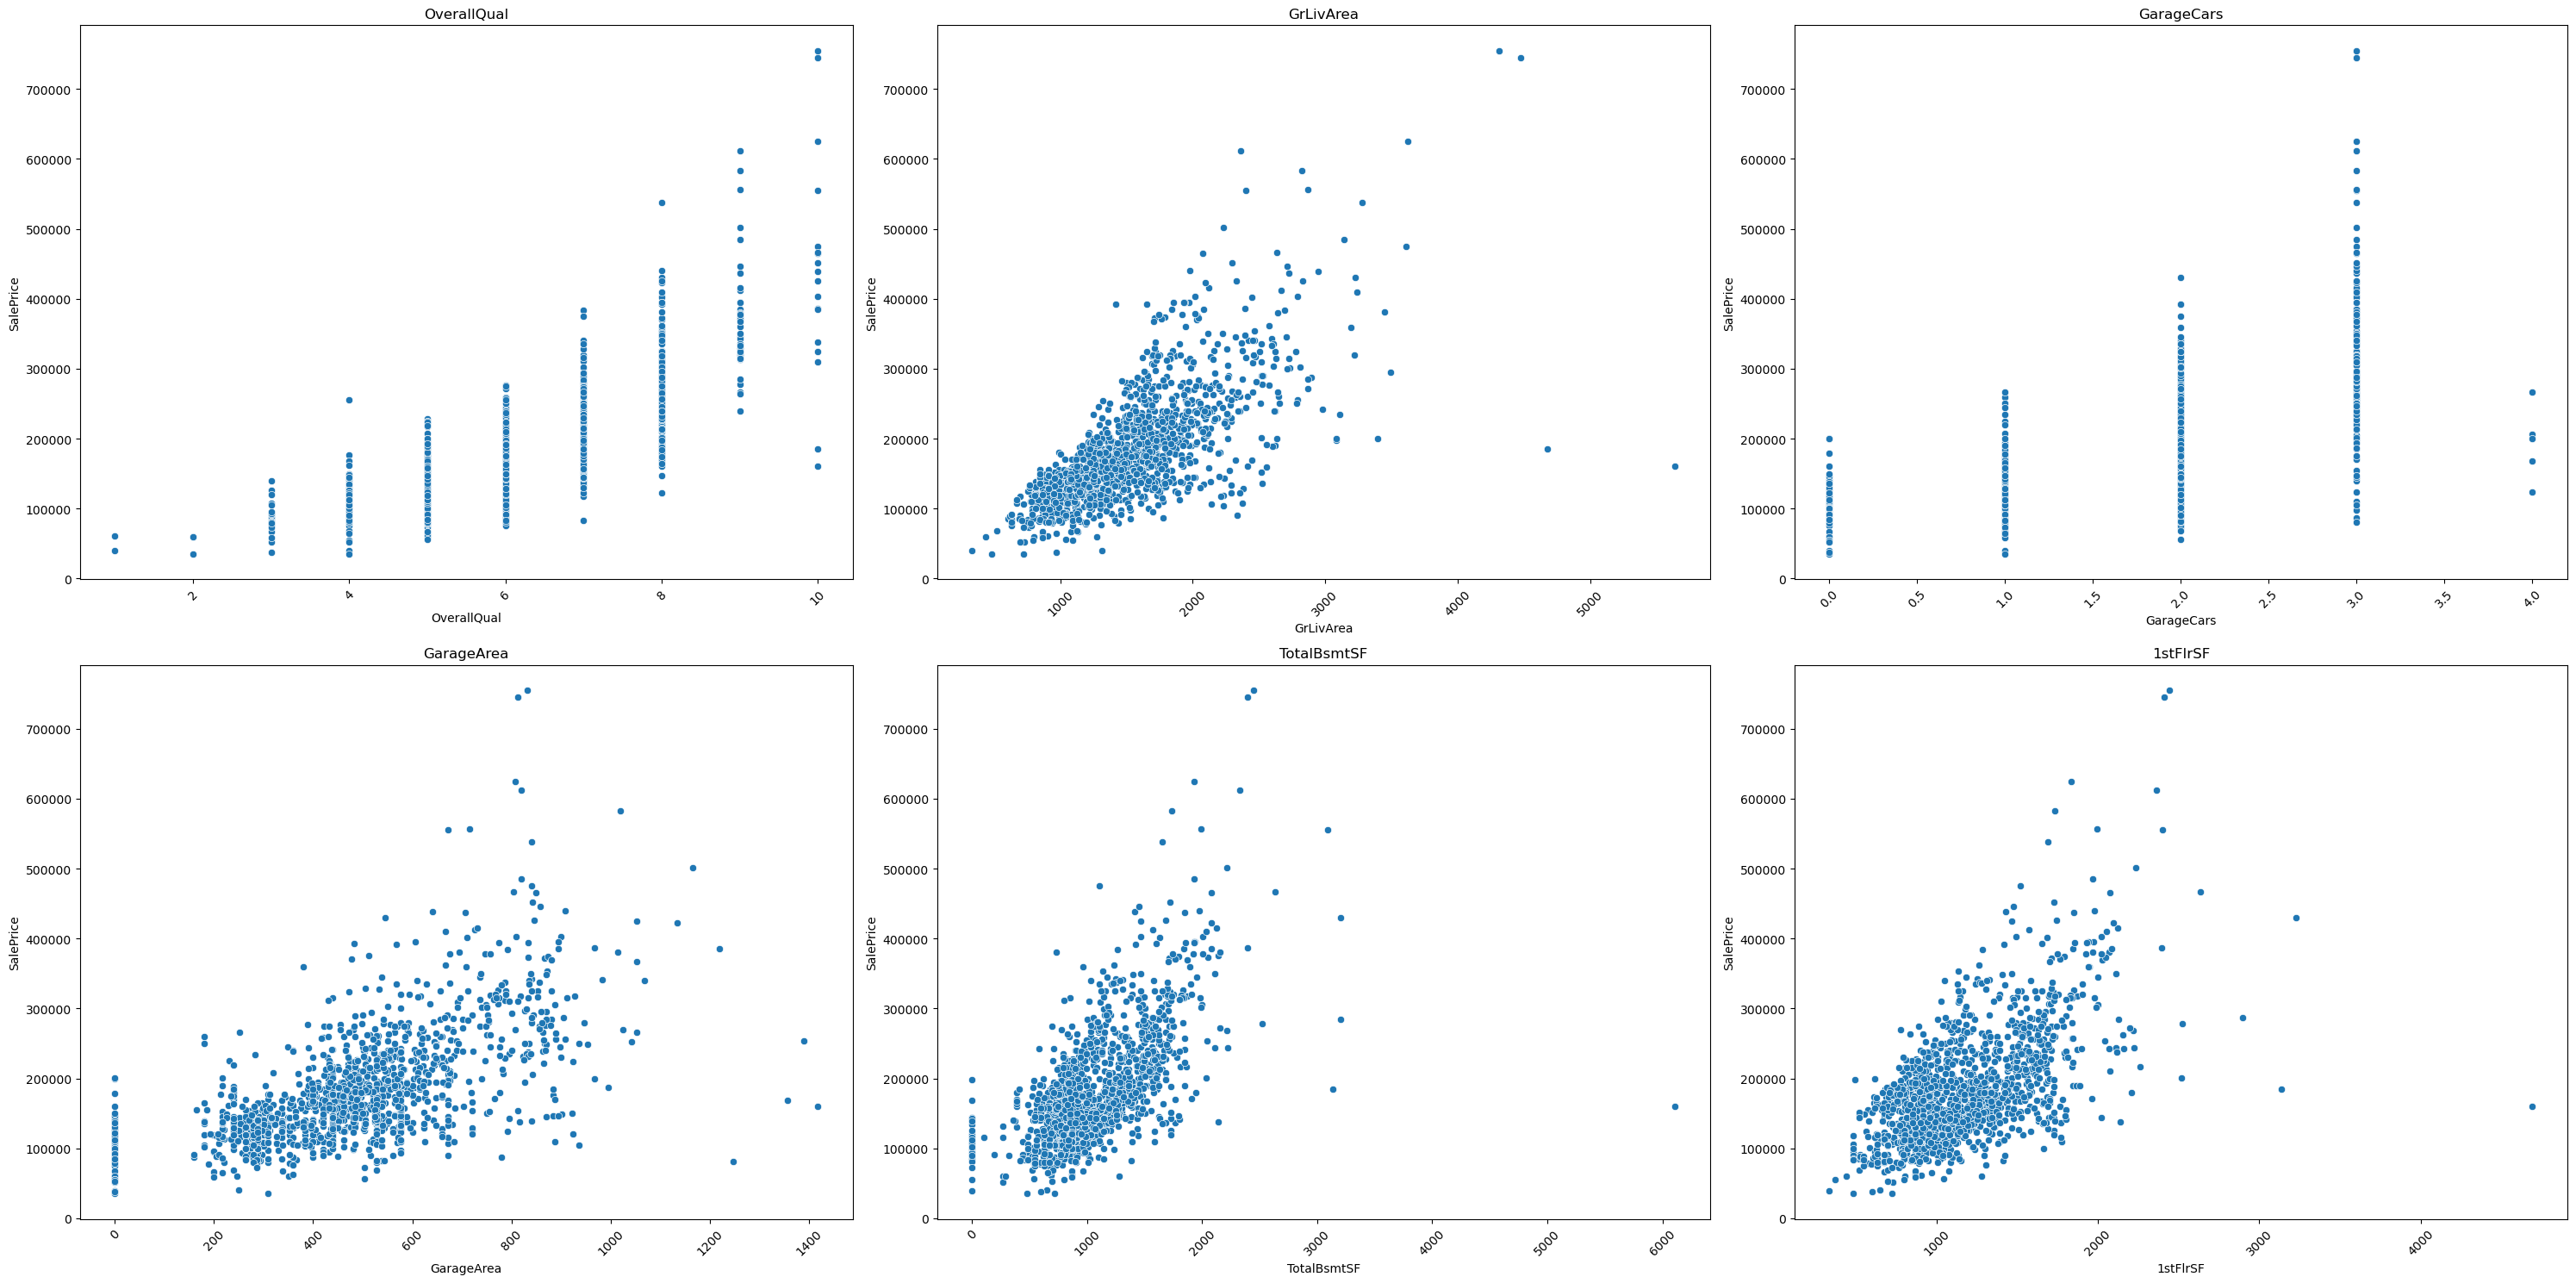

In [170]:
all_num_cols=['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea','TotalBsmtSF', '1stFlrSF']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(all_num_cols):
    sns.scatterplot(data=new_dataset, y=new_dataset['SalePrice'], x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()

In [171]:
def remove_outliers_iqr(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

for col in num_final.columns:
    new_dataset = remove_outliers_iqr(new_dataset, col)


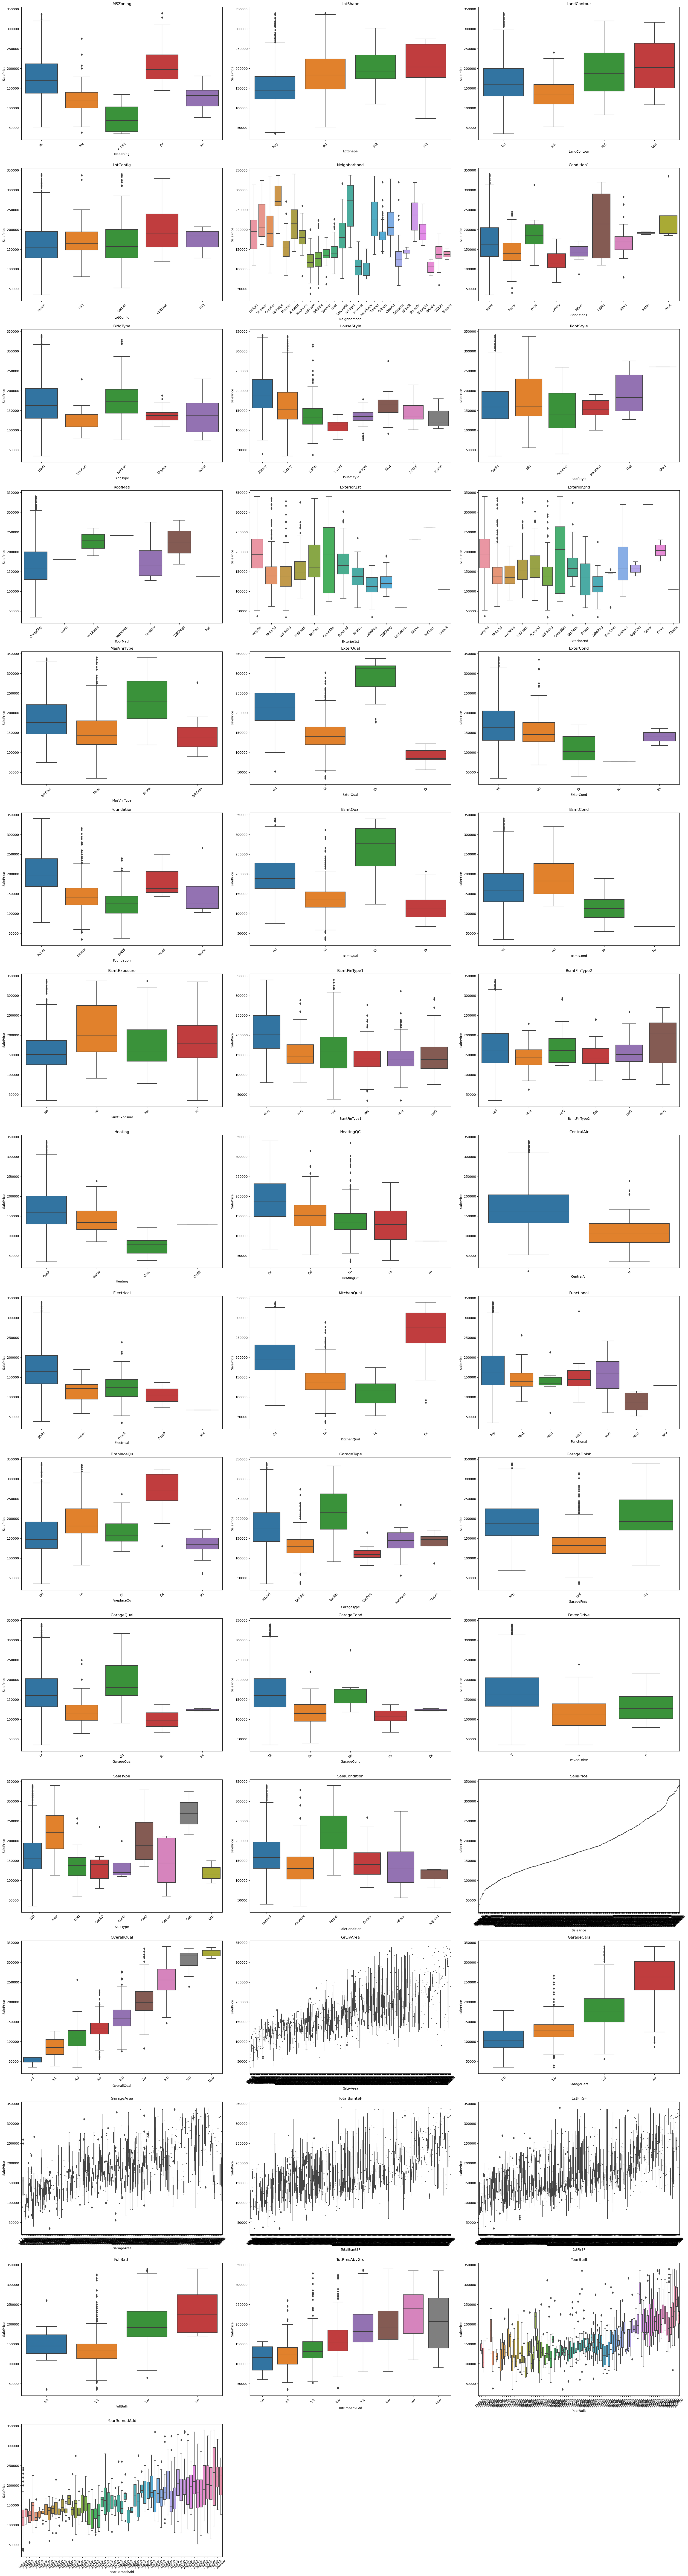

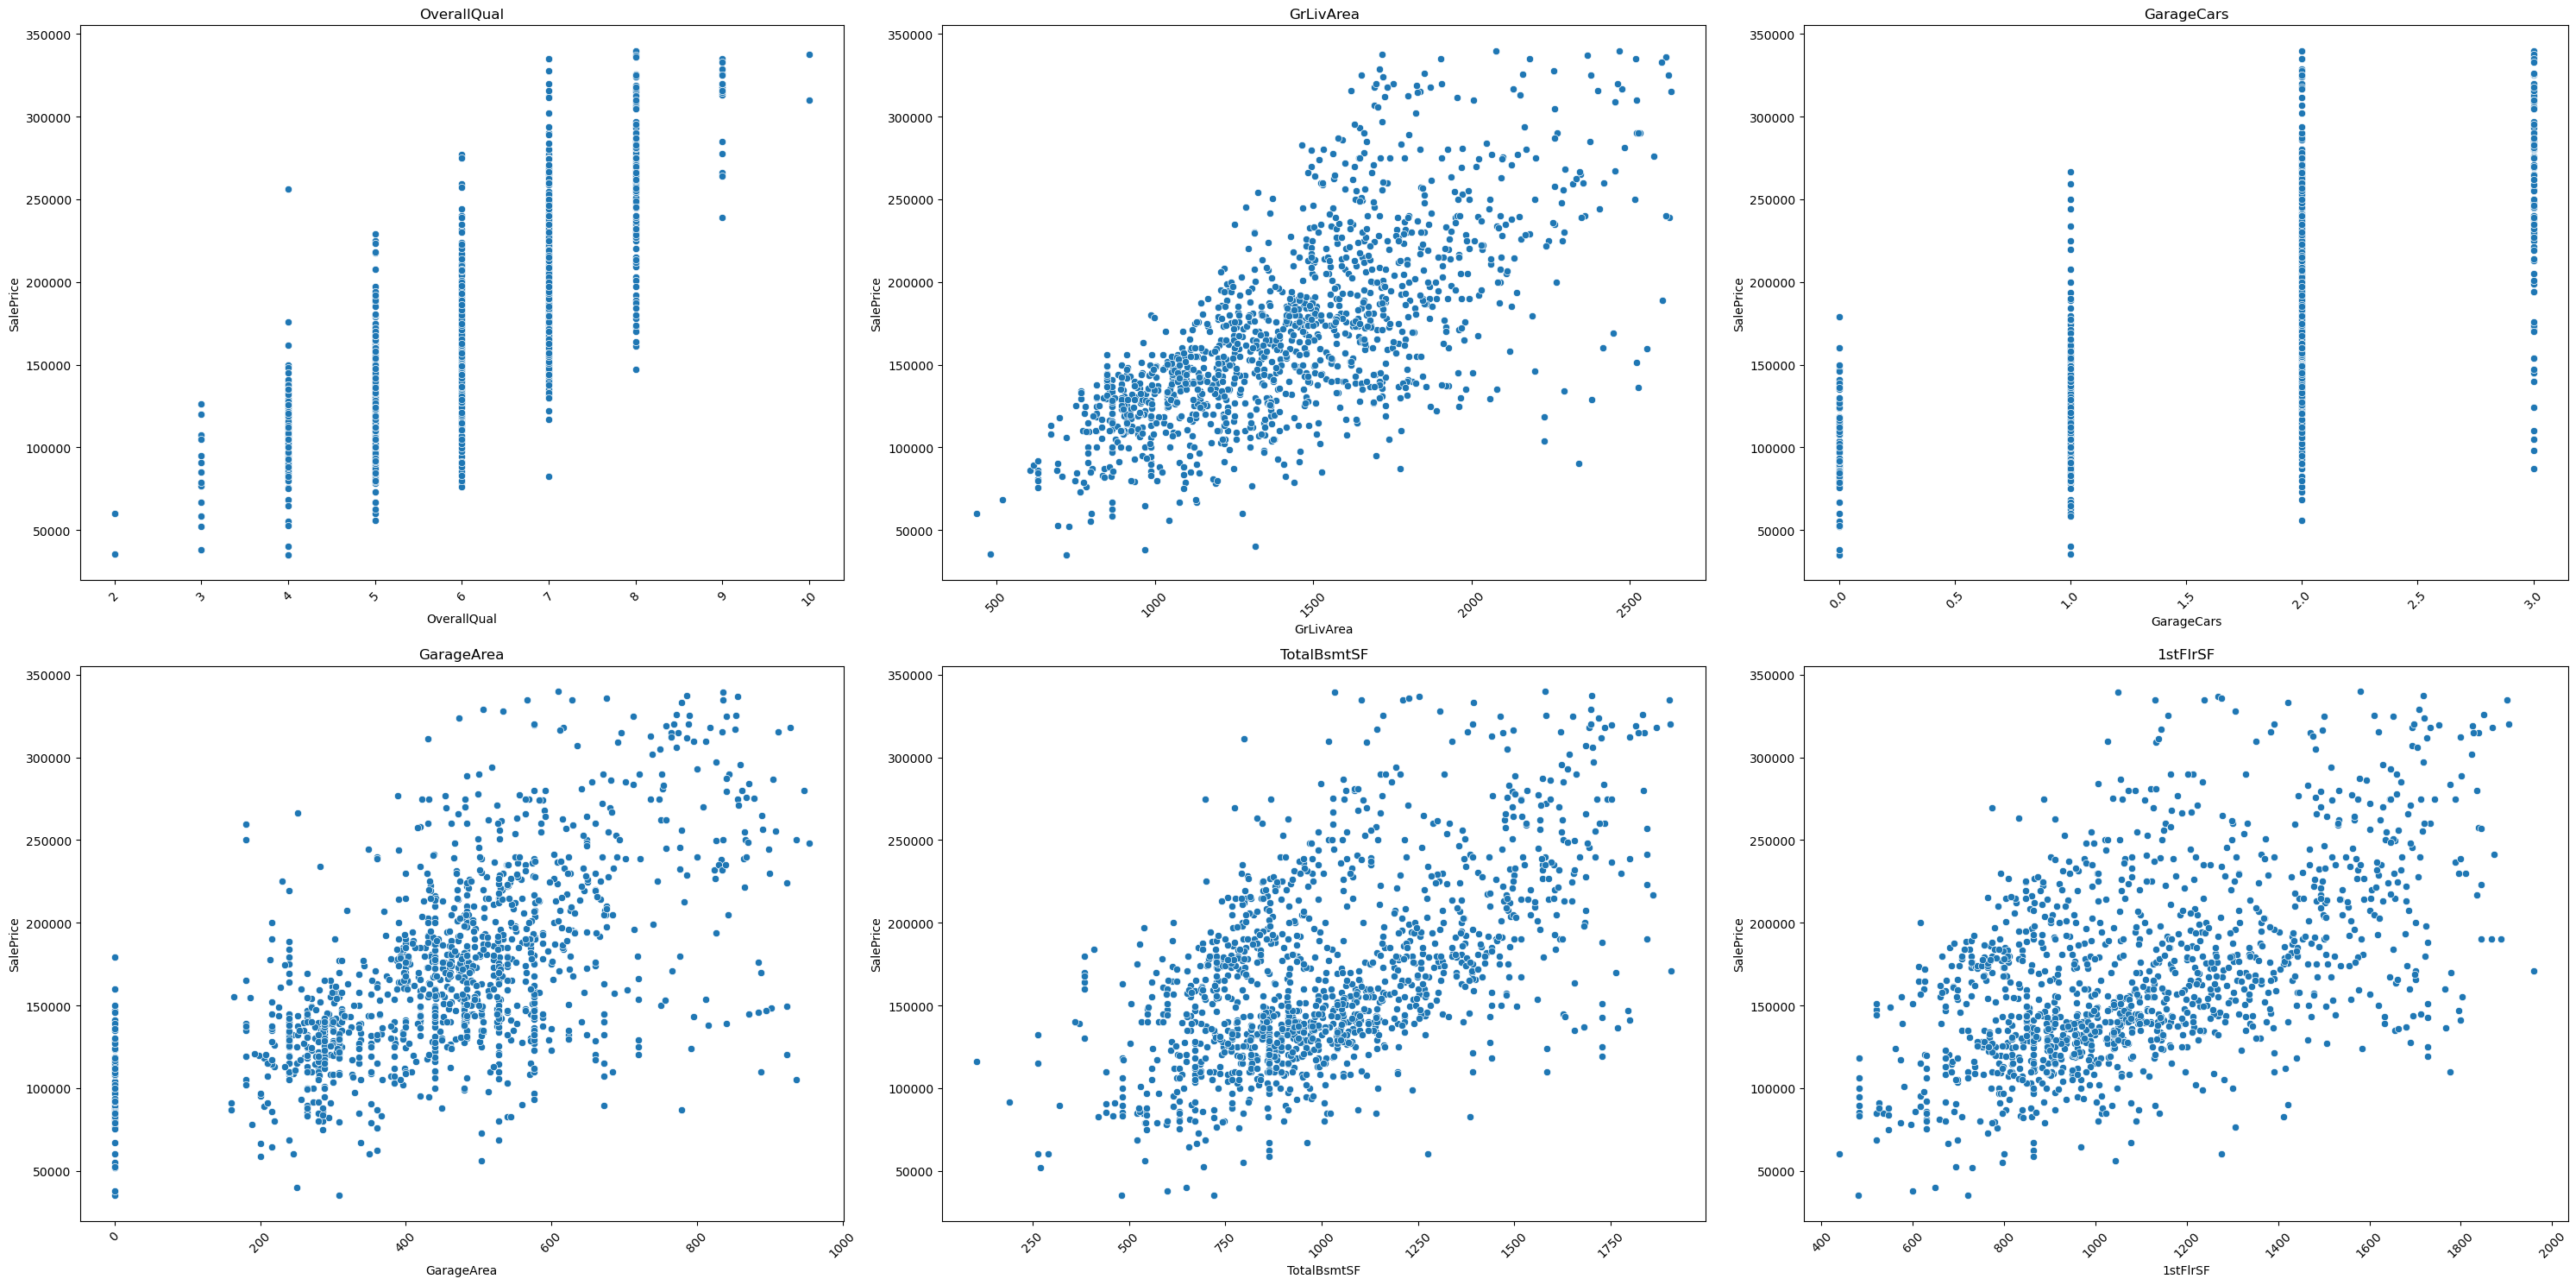

In [172]:
all_cols = list(new_dataset.columns)
num_rows = (len(all_cols) + 2) // 3  
fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(30, 7 * num_rows))

if len(all_cols) % 3 != 0:
    for i in range(len(all_cols) % 3, 3):
        fig.delaxes(axes[num_rows - 1, i])

axes = axes.flatten()

for i, col in enumerate(all_cols):
    sns.boxplot(data=new_dataset, y='SalePrice', x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=45)

plt.tight_layout()
plt.show()


all_num_cols = ['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF', '1stFlrSF']
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(30, 15))
axes = axes.flatten()

for i, col in enumerate(all_num_cols):
    sns.scatterplot(data=new_dataset, y=new_dataset['SalePrice'], x=col, ax=axes[i])
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', labelrotation=45)
    
plt.tight_layout()
plt.show()


In [178]:
new_dataset_encoded = pd.get_dummies(new_dataset, drop_first=True)
x= new_dataset_encoded.drop('SalePrice', axis=1)
y= new_dataset_encoded['SalePrice']

In [179]:
x

OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0             7.0     1710.0         2.0       548.0        856.0     856.0   
1             6.0     1262.0         2.0       460.0       1262.0    1262.0   
2             7.0     1786.0         2.0       608.0        920.0     920.0   
3             7.0     1717.0         3.0       642.0        756.0     961.0   
4             8.0     2198.0         3.0       836.0       1145.0    1145.0   
...           ...        ...         ...         ...          ...       ...   
1454          7.0     1221.0         2.0       400.0       1221.0    1221.0   
1455          6.0     1647.0         2.0       460.0        953.0     953.0   
1457          7.0     2340.0         1.0       252.0       1152.0    1188.0   
1458          5.0     1078.0         1.0       240.0       1078.0    1078.0   
1459          5.0     1256.0         1.0       276.0       1256.0    1256.0   

      FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  ...  SaleType_ConLI  \
0          2.0           8.0     2003.0        2003.0  ...               0   
1          2.0           6.0     1976.0        1976.0  ...               0   
2          2.0           6.0     2001.0        2002.0  ...               0   
3          1.0           7.0     1915.0        1970.0  ...               0   
4          2.0           9.0     2000.0        2000.0  ...               0   
...        ...           ...        ...           ...  ...             ...   
1454       2.0           6.0     2004.0        2005.0  ...               0   
1455       2.0           7.0     1999.0        2000.0  ...               0   
1457       2.0           9.0     1941.0        2006.0  ...               0   
1458       1.0           5.0     1950.0        1996.0  ...               0   
1459       1.0           6.0     1965.0        1965.0  ...               0   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0                  0             0             0            1   
1                  0             0             0            1   
2                  0             0             0            1   
3                  0             0             0            1   
4                  0             0             0            1   
...              ...           ...           ...          ...   
1454               0             0             0            1   
1455               0             0             0            1   
1457               0             0             0            1   
1458               0             0             0            1   
1459               0             0             0            1   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                         0                     0                     0   
1                         0                     0                     0   
2                         0                     0                     0   
3                         0                     0                     0   
4                         0                     0                     0   
...                     ...                   ...                   ...   
1454                      0                     0                     0   
1455                      0                     0                     0   
1457                      0                     0                     0   
1458                      0                     0                     0   
1459                      0                     0                     0   

      SaleCondition_Normal  SaleCondition_Partial  
0                        1                      0  
1                        1                      0  
2                        1                      0  
3                        0                      0  
4                        1                      0  
...                    ...                    ...  
1454                     1                      0  
1455                  

In [180]:
y

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
          ...   
1454    185000.0
1455    175000.0
1457    266500.0
1458    142125.0
1459    147500.0
Name: SalePrice, Length: 1297, dtype: float64